# K-L and AS modes

Open this notebook after 05_SPDE_on_fenics_solver.ipynb and 05_SPDE_on_athena_vectorial_AS.ipynb.

This notebook can be useful to plot the modes of the Karhunen-Loève decomposition and compare them with the active vectors obtained from 05_SPDE_on_athena_vectorial_AS.ipynb.

This notebook uses [fenics](https://fenicsproject.org/).

(10, 5)
(10, 3194)
(5, 3194)


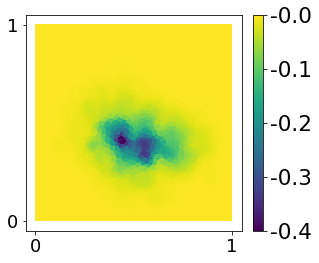

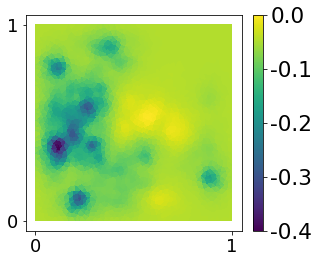

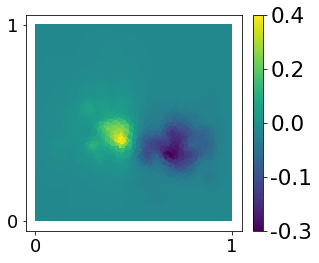

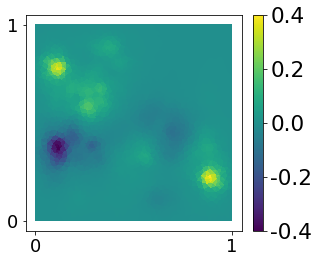

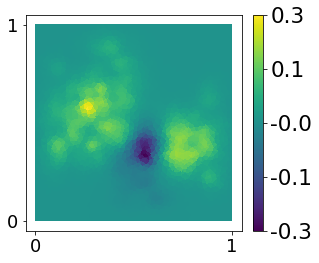

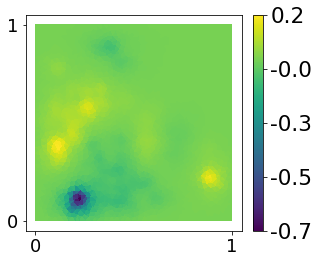

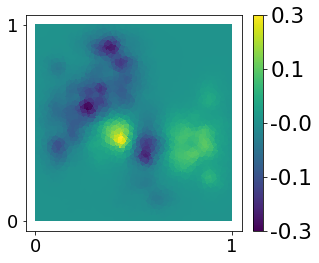

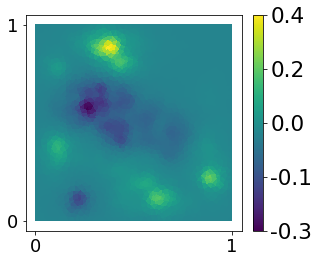

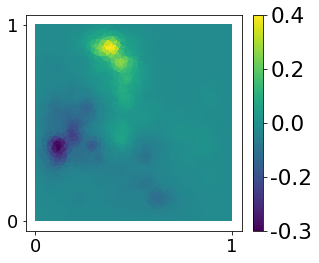

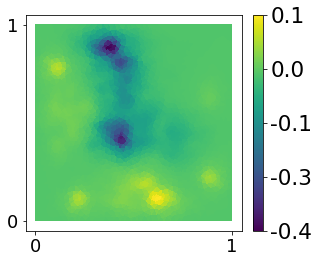

In [1]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import os
plt.rcParams.update({'font.size': 18})

# Create mesh
mesh = Mesh("data/mesh.xml")
c = MeshFunction("double", mesh, 2)
kar = MeshFunction("double", mesh, 2)

modes= np.load("05_SPDE/modes_AS.npy")
E = np.load("05_SPDE/cov_modes.npy")
sample = modes.T.dot(E)

print(modes.shape)
print(E.shape)
print(sample.shape)
sample_k = E[:5, :]

# Iterate over mesh and set values
for j in range(5):
    for i, cell in enumerate(cells(mesh)):
        c[cell] = sample[j, i]
        kar[cell] = sample_k[j, i]

    plt.figure(figsize=(5, 4))
    pl = plot(kar)
    v1 = np.linspace(kar.array().min(), kar.array().max(), 5)
    cb = plt.colorbar(pl,fraction=0.046, pad=0.04, ticks=v1)
    cb.ax.tick_params(labelsize='large')
    cb.ax.set_yticklabels(["{:2.1f}".format(i) for i in v1])
    plt.tight_layout()
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.show()
    # plt.savefig("KAR_"+str(j)+".pdf", bbox_inches='tight')
    # plt.close()
    
    plt.figure(figsize=(5, 4))
    pl = plot(c)
    v1 = np.linspace(c.array().min(), c.array().max(), 5)
    cb = plt.colorbar(pl,fraction=0.046, pad=0.04, ticks=v1)
    cb.ax.tick_params(labelsize='large')
    cb.ax.set_yticklabels(["{:2.1f}".format(i) for i in v1])
    plt.tight_layout()
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.show()
    # plt.savefig("AS_output_"+output+str(j)+".pdf", bbox_inches='tight')
    # plt.close()